### `8. Feature Selection`

**Definition**: Pemilihan fitur adalah proses memilih subset fitur yang relevan untuk digunakan dalam pembangunan model machine learning.

Memiliki lebih banyak data tidak selalu berarti hasil yang lebih baik. Menyertakan fitur yang tidak relevan (yang tidak membantu prediksi) dan fitur yang redundan (tidak relevan jika fitur lain ada) hanya akan membuat proses pembelajaran menjadi berlebihan dan berisiko menyebabkan overfitting.

Dengan melakukan pemilihan fitur, kita dapat:

- Menyederhanakan model untuk membuatnya lebih mudah diinterpretasikan.
- Memperpendek waktu pelatihan dan mengurangi biaya komputasi.
- Mengurangi biaya dalam pengumpulan data.
- Menghindari masalah dimensi tinggi (curse of dimensionality).
- Meningkatkan generalisasi dengan mengurangi overfitting.

Perlu diingat bahwa subset fitur yang berbeda memberikan kinerja optimal untuk algoritma yang berbeda. Jadi, pemilihan fitur bukanlah proses terpisah dari pelatihan model machine learning. Jika kita memilih fitur untuk model linier, lebih baik menggunakan prosedur seleksi yang ditargetkan untuk model tersebut, seperti pentingnya koefisien regresi atau Lasso. Dan jika kita memilih fitur untuk model berbasis pohon (tree), lebih baik menggunakan pentingnya yang diturunkan dari pohon.

#### **7.1. Pemilihan Fitur Statistik Univariat / Metode Filter**

Metode filter memilih fitur berdasarkan ukuran kinerja terlepas dari algoritma machine learning yang akan digunakan kemudian.

Filter univariat mengevaluasi dan memberi peringkat pada fitur tunggal menurut kriteria tertentu, sedangkan filter multivariat mengevaluasi seluruh ruang fitur.  

Metode filter

- Memilih variabel tanpa memperhatikan model.
- Kurang mahal secara komputasi.
- Biasanya memberikan kinerja prediksi yang lebih rendah.

Oleh karena itu, metode filter cocok untuk langkah pertama dalam pemilihan cepat dan penghapusan fitur yang tidak relevan.

| **Method** | **Definition** |
| --- | --- |
| Correlation | remove features that are highly correlated with each other |
| Chi-Square | 	Compute chi-squared stats between each non-negative feature and class |
| Mutual Information Filter | Mutual information measures how much information the presence/absence of a feature contributes to making the correct prediction on Y. |

Metode:

- Korelasi: Menghapus fitur yang sangat berkorelasi satu sama lain. Fitur yang berkorelasi tinggi dapat menyebabkan redundansi, yang mempengaruhi interpretabilitas model, meskipun fitur yang berkorelasi tidak selalu mempengaruhi kinerja model seperti pada pohon keputusan.  
- Chi-Square: Menghitung statistik chi-square antara setiap fitur non-negatif dan kelas. Uji ini menilai sejauh mana fitur dapat membedakan kelas target.  
- Mutual Information Filter: Mengukur seberapa banyak informasi yang diberikan oleh keberadaan/ketiadaan fitur dalam membuat prediksi yang benar tentang variabel target (Y).  

**Note:** Ketika menggunakan uji chi-square atau metode seleksi univariat, pada dataset yang sangat besar, sebagian besar fitur akan menunjukkan nilai p yang kecil dan tampak sangat prediktif. Ini sebenarnya adalah efek ukuran sampel. Jadi, harus hati-hati dalam memilih fitur menggunakan prosedur ini. Nilai p yang sangat kecil tidak selalu menandakan fitur yang sangat penting, tetapi lebih menunjukkan bahwa dataset memiliki terlalu banyak sampel.

**Note:** Mengurangi fitur yang sangat berkorelasi atau tinggi dimensi adalah langkah penting untuk menjaga model tetap interpretable dan efektif.

In [42]:
import pandas as pd  
import numpy as np 

import warnings 
warnings.filterwarnings('ignore')

In [43]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
data = pd.DataFrame(np.c_[data['data'],data['target']],columns=np.append(data['feature_names'],['target']))
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In [44]:
data.shape

(569, 31)

In [45]:
from sklearn.model_selection import train_test_split

X = data.drop(columns='target' )
y = data ['target' ]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =.2,random_state=0,stratify=y)

In [46]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

> Correlation

In [47]:
threshold = 0.5

correlation = X.corr()
correlation = correlation.abs (). unstack()
correlation = correlation. sort_values(ascending=False)
correlation = correlation[correlation < 1]
correlation = correlation [correlation > threshold]
correlation = pd. DataFrame(correlation).reset_index()
correlation. columns = ['features1', 'features2', 'corr']
correlation

,features1,features2,corr
0,mean radius,mean perimeter,0.997855
1,mean perimeter,mean radius,0.997855
2,worst radius,worst perimeter,0.993708
3,worst perimeter,worst radius,0.993708
4,mean area,mean radius,0.987357
...,...,...,...
285,worst concave points,mean smoothness,0.503053
286,worst concave points,worst symmetry,0.502528
287,worst symmetry,worst concave points,0.502528
288,mean concavity,mean symmetry,0.500667


In [48]:
grouped_feature_ls = []
correlated_group = []
for feature in correlation ['features1'].unique():
    correlated_block = correlation[correlation ['features1' ] == feature]
    grouped_feature_ls = grouped_feature_ls + list(correlated_block['features2'].unique()) + [feature]
    correlated_group.append(grouped_feature_ls)

In [49]:
correlated_group[1]

['mean perimeter',
 'mean area',
 'worst radius',
 'worst perimeter',
 'worst area',
 'mean concave points',
 'worst concave points',
 'area error',
 'radius error',
 'mean concavity',
 'perimeter error',
 'worst concavity',
 'mean compactness',
 'mean radius',
 'mean radius',
 'mean area',
 'worst perimeter',
 'worst radius',
 'worst area',
 'mean concave points',
 'worst concave points',
 'area error',
 'mean concavity',
 'perimeter error',
 'radius error',
 'worst concavity',
 'mean compactness',
 'mean perimeter']

> Mutual Information Filter

- SelectPercentile: Select features based on percentile of the highest scores.
- SelectKBest: Select features according to the k highest scores.

score: 
- mutual_info_classif: Mutual information for a discrete target (classification)
- mutual_info_regression: Mutual information for a continuous target (regression)

In [50]:
from sklearn. feature_selection import mutual_info_classif, SelectKBest, SelectPercentile

In [51]:
def mutual_info(X,y, select_value=10): # fitur default 10
    if select_value >= 1:
        selector = SelectKBest(mutual_info_classif, k=select_value).fit(X,y)
        col = X.columns[selector.get_support()]
    elif 0 < select_value < 1:
        selector = SelectPercentile(mutual_info_classif, percentile=select_value*100).fit(X,y)
        col = X.columns[selector.get_support()]
    else:
        raise ValueError('select_value must be positive number')
    return col

In [52]:
mutual_info(X,y)

Index(['mean radius', 'mean perimeter', 'mean area', 'mean concavity',
       'mean concave points', 'area error', 'worst radius', 'worst perimeter',
       'worst area', 'worst concave points'],
      dtype='object')

In [53]:
mutual_info(X,y,.4) # 12 fitur

Index(['mean radius', 'mean perimeter', 'mean area', 'mean concavity',
       'mean concave points', 'perimeter error', 'area error', 'worst radius',
       'worst perimeter', 'worst area', 'worst concavity',
       'worst concave points'],
      dtype='object')

In [54]:
mutual_info(X,y,20) # 20 fitur

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean compactness', 'mean concavity', 'mean concave points',
       'radius error', 'perimeter error', 'area error', 'concavity error',
       'concave points error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points'],
      dtype='object')

> Chi-Square Filter

- chi2: Chi-squared stats of non-negative features for classification tasks.

In [55]:
from sklearn. feature_selection import chi2

In [56]:
def chi_square(X,y, select_value=10):
    if select_value >= 1:
        selector = SelectKBest(chi2, k=select_value).fit(X,y)
        col = X.columns[selector.get_support()]
    elif 0 < select_value < 1:
        selector = SelectPercentile(chi2, percentile=select_value*100).fit(X,y)
        col = X.columns[selector.get_support()]
    else:
        raise ValueError('select_value must be positive number')
    return col

In [57]:
chi_square(X,y)

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'perimeter error', 'area error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area'],
      dtype='object')

In [58]:
chi_square(X,y,.2)

Index(['mean perimeter', 'mean area', 'area error', 'worst radius',
       'worst perimeter', 'worst area'],
      dtype='object')

#### **7.2. Iterative Feature Selection / Wrapper Method**

Wrappers use a search strategy to search through the space of possible feature subsets and evaluate each subset by the quality of the performance on a ML algorithm. Practically any combination of search strategy and algorithm can be used as a wrapper. It is featured as:

- use ML models to score the feature subset
- train a new model on each subset
- very computationally expensive
- usually provide the best performing subset for a give ML algorithm, but probably not for another
- need an arbitrary defined stopping criteria

The most common **search strategy** group is Sequential search, including Forward Selection, Backward Elimination and Exhaustive Search. Randomized search is another popular choice, including Evolutionary computation algorithms such as genetic, and Simulated annealing.

Another key element in wrappers is **stopping criteria**. When to stop the search? In general there're three:

- performance increase
- performance decrease
- predefined number of features is reached

#### **7.2.1 Forward Selection**

Step forward feature selection starts by evaluating all features individually and selects the one that generates the best performing algorithm, according to a pre-set evaluation criteria. In the second step, it evaluates all possible combinations of the selected feature and a second feature, and selects the pair that produce the best performing algorithm based on the same pre-set criteria.

This selection procedure is called greedy, because it evaluates all possible single, double, triple and so on feature combinations. Therefore, it is quite computationally expensive, and sometimes, if feature space is big, even unfeasible.

![alt text](FFS.jpg)

#### **7.2.2 Backward Elimination**

Step backward feature selection starts by fitting a model using all features. Then it removes one feature. It will remove the one that produces the highest performing algorithm (least statistically significant) for a certain evaluation criteria. In the second step, it will remove a second feature, the one that again produces the best performing algorithm. And it proceeds, removing feature after feature, until a certain criteria is met.

![alt text](BFS.jpg)

#### **7.2.3 Exhaustive Feature Selection**

In an exhaustive feature selection the best subset of features is selected, over all possible feature subsets, by optimizing a specified performance metric for a certain machine learning algorithm. For example, if the classifier is a logistic regression and the dataset consists of 4 features, the algorithm will evaluate all 15 feature combinations as follows:

- all possible combinations of 1 feature
- all possible combinations of 2 features
- all possible combinations of 3 features
- all the 4 features

and select the one that results in the best performance (e.g., classification accuracy) of the logistic regression classifier.

This exhaustive search is very computationally expensive. In practice for this computational cost, it is rarely used.

> Forward Selection

In [59]:
from sklearn.ensemble import RandomForestClassifier
from mlxtend. feature_selection import SequentialFeatureSelector as SFS

In [60]:
forward = SFS(
    estimator=RandomForestClassifier(n_estimators=5, n_jobs=1, random_state=0),
    k_features='best',
    forward=True,
    floating=False,
    verbose=1,
    scoring='accuracy',
    cv=3
)

forward = forward.fit(np.array(X_train),y_train)

Features: 30/30

In [61]:
selector_forward = X_train.columns[list(forward.k_feature_idx_)]
selector_forward

Index(['mean texture', 'mean concave points', 'concave points error',
       'worst radius', 'worst texture', 'worst area', 'worst smoothness',
       'worst concavity', 'worst concave points', 'worst fractal dimension'],
      dtype='object')

In [62]:
pd.DataFrame.from_dict(forward.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(23,)","[0.9144736842105263, 0.868421052631579, 0.9006...",0.894519,"(23,)",0.043423,0.019296,0.013644
2,"(23, 29)","[0.9605263157894737, 0.9210526315789473, 0.960...",0.947281,"(23, 29)",0.041736,0.018547,0.013115
3,"(7, 23, 29)","[0.9671052631578947, 0.9473684210526315, 0.960...",0.958246,"(7, 23, 29)",0.018414,0.008183,0.005786
4,"(7, 21, 23, 29)","[0.9671052631578947, 0.9671052631578947, 0.940...",0.958203,"(7, 21, 23, 29)",0.028332,0.01259,0.008903
5,"(7, 17, 21, 23, 29)","[0.9802631578947368, 0.9671052631578947, 0.973...",0.973626,"(7, 17, 21, 23, 29)",0.012089,0.005372,0.003799
6,"(7, 17, 21, 23, 24, 29)","[0.9736842105263158, 0.9671052631578947, 0.966...",0.969226,"(7, 17, 21, 23, 24, 29)",0.007097,0.003154,0.00223
7,"(7, 17, 21, 23, 24, 27, 29)","[0.9671052631578947, 0.9605263157894737, 0.980...",0.969255,"(7, 17, 21, 23, 24, 27, 29)",0.018334,0.008147,0.005761
8,"(7, 17, 20, 21, 23, 24, 27, 29)","[0.9671052631578947, 0.9736842105263158, 0.953...",0.964811,"(7, 17, 20, 21, 23, 24, 27, 29)",0.018771,0.008341,0.005898
9,"(7, 17, 20, 21, 23, 24, 26, 27, 29)","[0.9802631578947368, 0.9605263157894737, 0.980...",0.973641,"(7, 17, 20, 21, 23, 24, 26, 27, 29)",0.020868,0.009273,0.006557
10,"(1, 7, 17, 20, 21, 23, 24, 26, 27, 29)","[0.9736842105263158, 0.9802631578947368, 0.980...",0.978027,"(1, 7, 17, 20, 21, 23, 24, 26, 27, 29)",0.006911,0.003071,0.002172


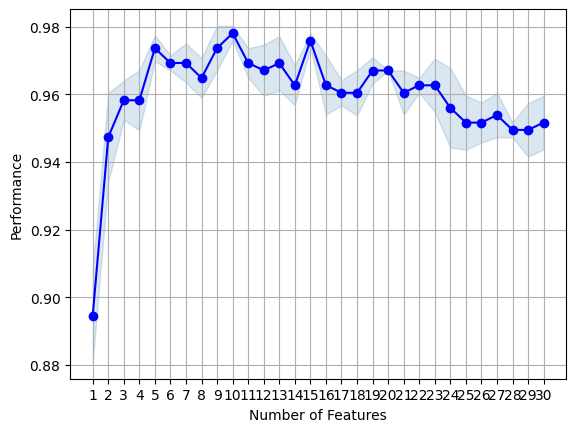

In [63]:
from mlxtend. plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

plot_sfs(forward.get_metric_dict(), kind='std_err')
plt.grid()

> Backward Elimination

In [64]:
backward = SFS(
    estimator=RandomForestClassifier(n_estimators=5, n_jobs=1, random_state=0),
    k_features='best',
    forward=False,
    floating=False,
    verbose=1,
    scoring='accuracy',
    cv=3
)

backward = backward.fit(np.array(X_train),y_train)

Features: 1/11

In [65]:
selector_backward = X_train.columns [list(backward.k_feature_idx_)]
selector_backward

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean smoothness',
       'mean concave points', 'mean fractal dimension', 'texture error',
       'perimeter error', 'smoothness error', 'compactness error',
       'concavity error', 'symmetry error', 'worst radius', 'worst perimeter',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [66]:
selector_backward

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean smoothness',
       'mean concave points', 'mean fractal dimension', 'texture error',
       'perimeter error', 'smoothness error', 'compactness error',
       'concavity error', 'symmetry error', 'worst radius', 'worst perimeter',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [67]:
pd.DataFrame.from_dict(backward.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
30,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.9407894736842105, 0.9671052631578947, 0.947...",0.951638,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.025268,0.011229,0.00794
29,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14,...","[0.9605263157894737, 0.9407894736842105, 0.966...",0.956068,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14,...",0.025004,0.011111,0.007857
28,"(0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 14, 15...","[0.9473684210526315, 0.9802631578947368, 0.960...",0.962632,"(0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 14, 15...",0.030454,0.013533,0.009569
27,"(0, 1, 2, 3, 4, 7, 8, 9, 10, 11, 12, 14, 15, 1...","[0.9671052631578947, 0.9671052631578947, 0.953...",0.962618,"(0, 1, 2, 3, 4, 7, 8, 9, 10, 11, 12, 14, 15, 1...",0.014282,0.006346,0.004488
26,"(0, 1, 2, 3, 4, 7, 8, 9, 10, 11, 12, 14, 15, 1...","[0.9407894736842105, 0.9671052631578947, 0.973...",0.960468,"(0, 1, 2, 3, 4, 7, 8, 9, 10, 11, 12, 14, 15, 1...",0.031861,0.014159,0.010012
25,"(0, 1, 2, 3, 4, 7, 8, 9, 10, 11, 12, 14, 15, 1...","[0.9473684210526315, 0.9671052631578947, 0.966...",0.960454,"(0, 1, 2, 3, 4, 7, 8, 9, 10, 11, 12, 14, 15, 1...",0.020823,0.009253,0.006543
24,"(0, 1, 2, 4, 7, 8, 9, 10, 11, 12, 14, 15, 16, ...","[0.9736842105263158, 0.9605263157894737, 0.960...",0.964825,"(0, 1, 2, 4, 7, 8, 9, 10, 11, 12, 14, 15, 16, ...",0.014099,0.006265,0.00443
23,"(0, 1, 2, 4, 7, 9, 10, 11, 12, 14, 15, 16, 17,...","[0.9473684210526315, 0.9671052631578947, 0.960...",0.958246,"(0, 1, 2, 4, 7, 9, 10, 11, 12, 14, 15, 16, 17,...",0.018414,0.008183,0.005786
22,"(0, 1, 2, 4, 7, 9, 10, 11, 12, 14, 15, 16, 17,...","[0.9605263157894737, 0.9473684210526315, 0.966...",0.958261,"(0, 1, 2, 4, 7, 9, 10, 11, 12, 14, 15, 16, 17,...",0.018291,0.008128,0.005747
21,"(0, 1, 2, 4, 7, 9, 10, 11, 12, 14, 15, 16, 18,...","[0.9605263157894737, 0.9539473684210527, 0.953...",0.956039,"(0, 1, 2, 4, 7, 9, 10, 11, 12, 14, 15, 16, 18,...",0.007146,0.003176,0.002246


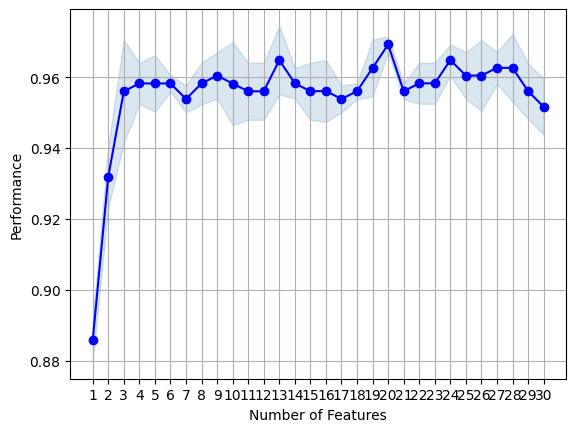

In [68]:
plot_sfs(backward.get_metric_dict(), kind='std_err')
plt.grid()

> Exhaustive Feature Selection

In [70]:
from mlxtend. feature_selection import ExhaustiveFeatureSelector as EFS

exhaust = EFS(
    estimator=RandomForestClassifier(n_estimators=5, n_jobs=1, random_state=0),
    min_features=2,
    max_features=2,
    n_jobs=1,
    scoring='accuracy',
    cv=3
)

exhaust = exhaust. fit(np.array(X_train), y_train)

Features: 435/435

AttributeError: `np.NINF` was removed in the NumPy 2.0 release. Use `-np.inf` instead.

#### **7.3. Model Based Feature Selection / Embedded Method**

Embedded Method combine the advantages of the filter and wrapper methods. A learning algorithm takes advantage of its own variable selection process and performs feature selection and classification at same time. Common embedded methods include Lasso and various types of tree-based algorithms. It is featured as:

- perform feature selection as part of the model building process
- consider interactions between features
- less computationally expensive as it only train the model once, compared to Wrappers
- usually provide the best performing subset for a give ML algorithm, but probably not for another

#### **7.3.1 Regularization with Lasso**

Lasso Regularization is commonly used as a feture selection criterion. It penalizes irrelevant parameters by shrinking their weights or coefficients to zero. Hence, those features are removed from the model, and it not only removes the extraneous features and prevents the model from overfitting. One can learn the complete working of regularization in [here](https://www.enjoyalgorithms.com/blog/regularization-in-machine-learning).

#### **7.3.2 Random Forest Feature Importance**

The tree based model approach naturally ranks the feature of a dataset by measuring how well the purity is improving. The measure of impurity is either the Gini impurity or the information gain/entropy. When training a tree, it is possible to compute how much each feature decreases the impurity. The more a feature decreases the impurity, the more important the feature is. In random forests, the impurity decrease from each feature can be averaged across trees to determine the final importance of the variable.

> L1 Regularization

> RF Feature Importances

### `Application`

`Load Dataset`


`Data Cleaning`

**Duplicated Value**, Deteksi dan kuantifikasi duplikasi data

Sebesar 16.15% data terindikasi duplikat, maka hilangkan salah satunya.

Handling duplikasi data:

**Missing Value**, Deteksi dan kuantifikasi missing value

Terdapat missing value pada kolom ph, sulphates, alcohol dan quality. Kita akan drop saja missing value tersebut.

**Change Target**, Mengubah target menjadi kategorikal biner.

`Data Splitting`

Bagi dataset menjadi train dan test set dengan komposisi 80:20.

`Data Preprocessing`

Selanjutnya kita akan melakukan preprocessing sebagai berikut:

### `Modeling`